<a href="https://colab.research.google.com/github/sandeepss2020/Computer_Vision/blob/main/CV_LAB5_Fouriertransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#All Point operation
#Image Negative



In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

(<matplotlib.axes._subplots.AxesSubplot at 0x7feea647af10>,
 Text(0.5, 1.0, 'Gray negative Image'))

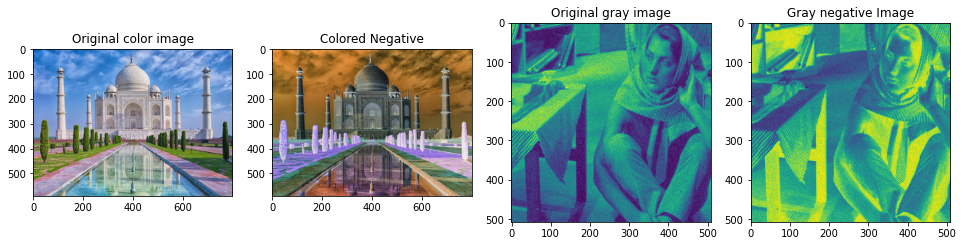

In [8]:
oimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/tajmm.jpg')
oimg = cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB)

ogray = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/n_image_girl.jpg',0)

colored_negative = abs(255-oimg)
gray_negative = abs(255-ogray)

plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(oimg), plt.title("Original color image")
plt.subplot(162), plt.imshow(colored_negative), plt.title("Colored Negative")
plt.subplot(163), plt.imshow(ogray), plt.title("Original gray image")
plt.subplot(164), plt.imshow(gray_negative), plt.title("Gray negative Image")


#Contrast Stretching

(<matplotlib.axes._subplots.AxesSubplot at 0x7fee9d9f2ad0>,
 Text(0.5, 1.0, 'Contrast stretched image'))

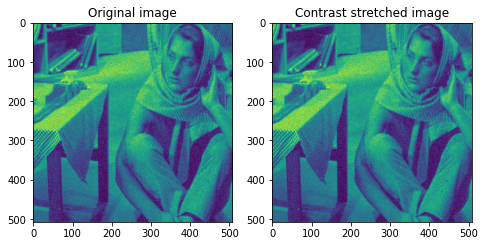

In [23]:
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/n_image_girl.jpg',0)


# Create zeros array to store the stretched image
minmax_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')

# Loop over the image and apply Min-Max formulae
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        minmax_img[i,j] = 255*(img1[i,j]-np.min(img1))/(np.max(img1)-np.min(img1))

# DisplaY the stretched image
plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(img1), plt.title("Original image")
plt.subplot(162), plt.imshow(minmax_img), plt.title("Contrast stretched image")


In [27]:
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/tajmm.jpg/')


# Create zeros array to store the stretched image
minmax_img = np.zeros((img1.shape[0],img1.shape[1],img1.shape[-1],img1.shape[0]),dtype = 'uint8')

# Loop over the image and apply Min-Max formulae
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        minmax_img[i,j] = 255*(img1[i,j]-np.min(img1))/(np.max(img1)-np.min(img1))

# DisplaY the stretched image
plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(img1), plt.title("Original image")
plt.subplot(162), plt.imshow(minmax_img), plt.title("Contrast stretched image")


AttributeError: ignored

#Gray level slicing

(<matplotlib.axes._subplots.AxesSubplot at 0x7feea63fb310>,
 Text(0.5, 1.0, 'Gray level sliced image'))

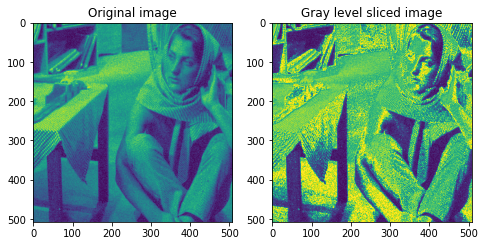

In [13]:

# Read the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/n_image_girl.jpg',0)

#  Find width and height of image
row, column= img.shape

#  Create an zeros array to store the sliced image
img1 = np.zeros((row,column),dtype = 'uint8')

#  Specify the min and max range
min_range = 80
max_range = 140

# Loop over the input image and if pixel value lies in desired range set it to 255 
# otherwise set it to desired value
for i in range(row):
    for j in range(column):
        if img[i,j]>min_range and img[i,j]<max_range: 
            img1[i,j] = 255
        else: 
            img1[i,j] = img[i-1,j-1] 

# Displat the stretched image
plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(img), plt.title("Original image")
plt.subplot(162), plt.imshow(img1), plt.title("Gray level sliced image")


# Ideal Low pass and Ideal High Pass filter in Fourier (Frequency) domain 

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


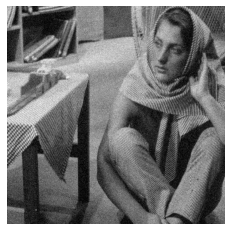

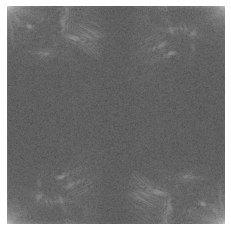

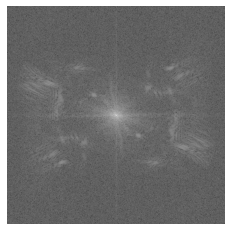

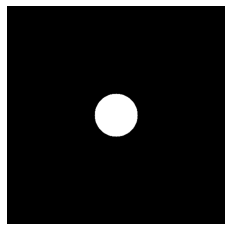

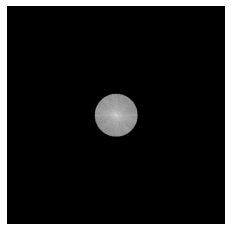

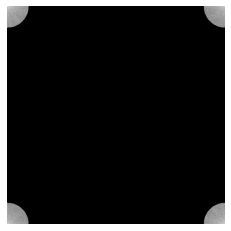

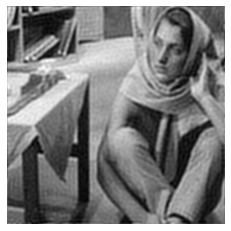

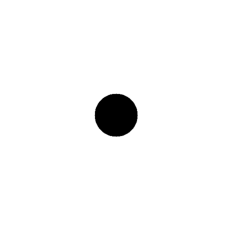

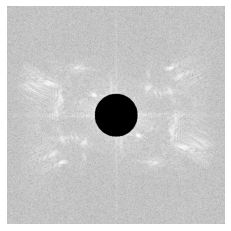

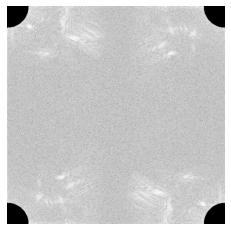

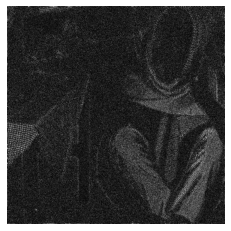

In [16]:
# original image
f = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/n_image_girl.jpg',0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

# image in frequency domain
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()

# Filter: Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

# Inverse the shifted Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

#Inverse the fourier transformation
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


In [19]:
from PIL import Image, ImageFilter


In [38]:
image = Image.open(r"/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/n_image_girl.jpg")
  
smol_image = image.crop((0, 0, 150, 150))
  
# Blurring on the cropped image
blurred_image = smol_image.filter(ImageFilter.GaussianBlur)
  
# Pasting the blurred image on the original image
out = image.paste(blurred_image, (0,0))
print(image.show)
# Displaying the image
# image.save('output.png')

<bound method Image.show of <PIL.BmpImagePlugin.BmpImageFile image mode=L size=508x508 at 0x7FEE9D8E7150>>
